<a href="https://colab.research.google.com/github/chen70335/phys_417_neural_networks/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab6 Report:
## German-to-English Translation with Attention-Mechanism Transformer Model

In [1]:
pip uninstall torch torchvision torchaudio torchtext -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [2]:
pip install torch==2.2.0 torchvision torchaudio torchtext==0.17.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2

In [1]:
pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [3]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import Iterable, List
from timeit import default_timer as timer

import torch
import torch.nn as nn
from torch.nn import Transformer
from torch import Tensor

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# Initialize your numpy and pytorch random seeds for reproducibility
# YOUR CODE HERE
np.random.seed(42)
torch.manual_seed(42)

# Create a torch.device object to tell pytorch where to store your tensors: cpu or gpu
# YOUR CODE HERE
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
from IPython.display import Image # For displaying images in colab jupyter cell

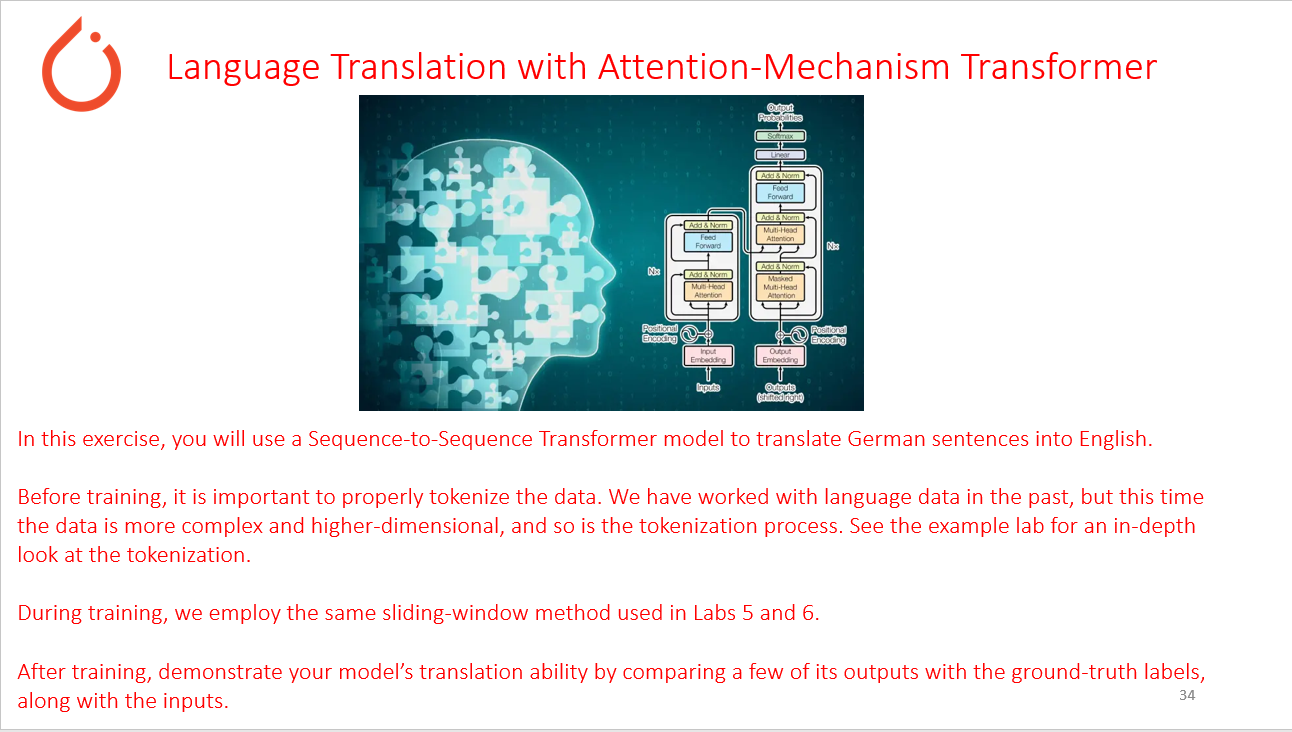

In [ ]:
Image('lab6_exercise.png', width = 1000)

In [4]:
# Seaborn plot styling
sns.set(style = 'white', font_scale = 2)

## Download data

In [16]:
# Load the data and store it as a list of tuples: each element in the list should be a tuple of the form (german_sentence, english_sentence)
# YOUR CODE HERE
def split_lines_by_first_period(filepath):
    results = []
    try:
        with open(filepath, 'r') as f:
            for line in f:
                line = line.strip()  # Remove leading/trailing whitespace
                parts = line.split('\t', 1)  # Split only at the first occurrence
                if len(parts) == 2:
                    results.append((parts[0], parts[1]))
                else:
                    results.append((parts[0], ''))  # If no period, second part is empty
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return []
    return results

de_to_en_list = split_lines_by_first_period('/content/de_to_en.txt')
# en_to_fr_list = split_lines_by_first_period('/content/en_to_fr.txt')


## Let's see what the data looks like

In [15]:
# Print the first ten translated lines
# YOUR CODE HERE
print(de_to_en_list[:10])

[]


## Create source and target language tokenizers

But first, what exactly is a *tokenizer*?

A short but incomplete summary is that a tokenizer converts your text/string into a list of numerical values (a list of *tokens*). We performed tokenization in Lab 5 when we converted each alphanumeric character in our text into a number (an index in a dictionary).

Here, the tokenization is a bit different. Instead of converting each *character* into a number, we want to convert each *word* into a number. As you can imagine, this means the vocabulary of our dataset - the set of unique tokens it contains - will be much larger. There are many more words in English than there are letters! This also means the value of each token will be more unique and meaningful.

Part of tokenizing at the word level is the process of standardizing the text by converting it to lowercase, removing punctuation or special characters, and dealing with contractions or other language-specific features. This is sometimes called *stemming*, reflecting the fact that we want to only extract the *essential meaning* of each word - the "stem" - not necessarily the punctuation, prefixes, suffixes, etc. surrounding it.

Luckily for us, there are some existing Python packages that do this automatically. The below cell downloads two different tokenizers (one each for the source and larget languages), and assigns them to appropriate keys within the "token_transform" dictionary.
In Lab 5, you performed tokenization when you converted each character of the text into a specific number.

In [8]:
!python -m spacy download de_core_news_sm


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.

In [9]:
!python -m spacy download en_core_web_sm


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.

In [17]:
# Define MACRO - a high-level variable that won't change throughout the duration of the code - for your source and target languages
# YOUR CODE HERE
SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'


# Download the German and English tokenizers, and assign them to appropriate keys in your token_transform dictionary
# YOUR CODE HERE
token_transform = {}
token_transform['de'] = get_tokenizer('spacy', language='de_core_news_sm')
token_transform['en'] = get_tokenizer('spacy', language='en_core_web_sm')

## Let's see what these specific tokenizers do.

In [18]:
# Tokenize the first line of each dataset, and print the tokenized version of it
# YOUR CODE HERE
en_0_tokenized = token_transform[SRC_LANGUAGE](de_to_en_list[0][1]) # "tokenize" each word
fr_0_tokenized = token_transform[TGT_LANGUAGE](de_to_en_list[0][0])

# Print the tokenized first line of each dataset
print(en_0_tokenized)
print(fr_0_tokenized)

['Two', 'young', ',', 'White', 'males', 'are', 'outside', 'near', 'many', 'bushes', '.']
['Zwei', 'junge', 'weiße', 'Männer', 'sind', 'i', 'm', 'Freien', 'in', 'der', 'Nähe', 'vieler', 'Büsche', '.']


## Create a vocabulary for each language's dataset

In Lab 5, we did this with a simple dictionary that mapped each character to an integer (and vice versa). However, PyTorch has a built-in dictionary object that provides some extra functionality.

We will create this object using torchtext.data.build_vocab_from_iterator(). This function takes an iterator as input and returns a torchtext.vocab.Vocab object. This is a dictionary-like object that maps tokens to indices, but where it differs from a normal dictionary, is that its indices are assigned based on the frequency of the tokens in the dataset. For example, the most frequent token gets the index 0, the second most frequent gets the index 1, and so on. This frequency-index mapping saves a bunch of compute time and resources.


Moreover, this time we will also have the four "special" tokens, that will always be assigned to the first four indices.

In [19]:
# Define a helper function that converts a list of strings into a list of lists-of-tokens
# YOUR CODE HERE
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
  language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

  for data_sample in data_iter:
      yield token_transform[language](data_sample[language_index[language]])

# Define your special tokens and their indeces in your vocabulary
# YOUR CODE HERE
special_tokens = ['<unk>', '<pad>', '<bos>', '<eos>']
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3


# Define your vocabulary for each language using the build_vocab_from_iterator function
# YOUR CODE HERE
vocab_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  # Create a torchtext.vocab.Vocab object for each language
  vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(de_to_en_list, ln),
                                                    min_freq=1,
                                                    specials=special_tokens,
                                                    special_first=True)


# Set ``UNK_IDX`` as the default index.
# YOUR CODE HERE
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

# Let's see the first 20 words in each vocabulary
# YOUR CODE HERE
print(vocab_transform[SRC_LANGUAGE].get_itos()[:20])
print(vocab_transform[TGT_LANGUAGE].get_itos()[:20])

['<unk>', '<pad>', '<bos>', '<eos>', '.', 'Ein', 'einem', 'in', 'und', ',', 'mit', 'auf', 'Mann', 'einer', 'Eine', 'ein', 'der', 'Frau', 'eine', 'die']
['<unk>', '<pad>', '<bos>', '<eos>', 'a', '.', 'A', 'in', 'the', 'on', 'is', 'and', 'man', 'of', 'with', ',', 'woman', 'are', 'to', 'Two']


## Train-Validate-Test split

In [20]:
# Shuffle the text pairs
# YOUR CODE HERE
shuffler = np.random.permutation(len(de_to_en_list))
de_to_en_list = [de_to_en_list[i] for i in shuffler]


# Let's go for a 70-20-10 train-val-test split
# YOUR CODE HERE
n_train = int(len(de_to_en_list) * 0.7)
train_pairs = de_to_en_list[:n_train]

# YOUR CODE HERE
n_val = int(len(de_to_en_list) * 0.2)
val_pairs = de_to_en_list[n_train:n_train+n_val]

# YOUR CODE HERE
n_test = int(0.1*len(de_to_en_list))
test_pairs = de_to_en_list[n_train+n_val:n_train+n_val+n_test]

# Check the size of each data set
# YOUR CODE HERE
print(len(train_pairs), len(val_pairs), len(test_pairs))

21713 6203 3101


### Mask functions

The mask function plays an essential role in the training of a transformer model, specifically during the pre-training phase when the model learns to understand and generate language. The two main purposes of the mask function are:

1. To facilitate self-attention mechanism: Transformers use self-attention mechanisms to identify relationships between words in a sequence. Masking is used to prevent the model from "cheating" by looking at future tokens when trying to predict the current token. In other words, the mask function ensures that the model only attends to the current token and the previous tokens, not the future tokens, during the training process.

2. To enable masked language modeling (MLM): Masked language modeling is a popular pre-training objective used in transformer-based models like BERT. In MLM, a certain percentage of input tokens are randomly masked (usually around 15%), and the model is tasked with predicting the original tokens at these masked positions. The mask function serves as a way of hiding the original token from the model, forcing it to learn contextual representations that can help it predict the masked tokens accurately.

The use of the mask function in both self-attention and MLM helps the transformer model learn meaningful context-dependent representations, making it more effective at understanding and generating natural language.

In [31]:
# Define your masking function
# YOUR CODE HERE
# sz : length of target sequence
def generate_square_subsequent_mask(sz):
  mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
  mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
  return mask

def create_mask(src, tgt):
  src_seq_len = src.shape[0]
  tgt_seq_len = tgt.shape[0]

  tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
  src_mask = torch.zeros((src_seq_len, src_seq_len), device=DEVICE).type(torch.bool)

  src_padding_mask = (src == PAD_IDX).transpose(0, 1) # a way for the model to know to ignore padding tokens because inputs may have varying lengths
  tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
  return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

## Collation

The collation function is what converts our strings into batches of tensors that can be processed by our model, based on the vocabularies and tokenization functions we have built up thus far.

Again, this is something we can do manually, but at some point the data transformations get so complicated that we might as well put them all into a function. Moreover, defining our transformation as a *function* allows us to use some more built-in PyTorch functionality that makes our jobs a whole lot easier. See: torch.utils.data.DataLoader.

In [22]:
# Define helper function to club together sequential operations
# YOUR CODE HERE
# a function that will then be used during collation which takes sample inputs
def sequential_transforms(*transforms):
  def func(txt_input):
    for transform in transforms:
      txt_input = transform(txt_input)
    return txt_input
  return func

# Define function to add BOS/EOS and create a tensor for input sequence indices
# YOUR CODE HERE
# this function takes token ids as input
# adds special beginning of sequence (BOS) and end of sequence (EOS) tokens to the input tokens
def tensor_transform(token_ids: List[int]):
  return torch.cat((torch.tensor([BOS_IDX]), # concetenate along existing dimension
                    torch.tensor(token_ids),
                    torch.tensor([EOS_IDX])))

# Define your ``src`` and ``tgt`` language text transforms to convert raw strings into tensors indices
# YOUR CODE HERE
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                             vocab_transform[ln], #Numericalization
                                             tensor_transform) # Add BOS/EOS and create tensor


# Define your "collation" function to collate data samples into batch tensors
# YOUR CODE HERE
def collate_fn(batch):
  src_batch, tgt_batch = [], []
  for src_sample, tgt_sample in batch:
    src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n"))) # perform sequence of transformations
    tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))
  src_batch = pad_sequence(src_batch, padding_value=PAD_IDX) # function from torch to make all samples input have the same length
  tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
  return src_batch, tgt_batch

# Define training, evaluation functions

Modularization is the name of the game.

Not only does this help us here, but if you ever need to train a similar model in the future, you can simply import the ones defined here!

For example, imagine this was a Python script and not a notebook, and the filename was "german_to_english_transformer.py" Then, in whichever future script or notebook you wish to use these functions, you could simply call:
"from german_to_english_transformer import train_epoch, evaluate"

In [23]:
# Define a function to train the model for a single epoch
# YOUR CODE HERE
def train_epoch(model, optimizer):
  model.train()
  loss_list = []
  train_iter = train_pairs
  train_dataloader = DataLoader(train_pairs, batch_size=BATCH_SIZE, collate_fn=collate_fn)

  for src, tgt in train_dataloader:
    src = src.to(DEVICE)
    tgt = tgt.to(DEVICE)
    tgt_input = tgt[:-1, :] # select all rows except the last one for the model to learn to predict

    src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

    logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)

    optimizer.zero_grad()

    tgt_out = tgt[1:, :] # ignore the first token because its <BOS>
    loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
    loss.backward()

    optimizer.step()
    loss_list.append(loss.item())
  return loss_list



# Define a function to evaluate the model
# YOUR CODE HERE
def evaluate(model):
  model.eval()
  loss_list = []
  val_iter = val_pairs
  val_dataloader = DataLoader(val_pairs, batch_size=BATCH_SIZE, collate_fn=collate_fn)
  for src, tgt in val_dataloader:
    src = src.to(DEVICE)
    tgt = tgt.to(DEVICE)
    tgt_input = tgt[:-1, :]

    src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
    logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)
    tgt_out = tgt[1:, :]
    loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
    loss_list.append(loss.item())
  return loss_list

## Define model

In [28]:
# Define the PositionalEncoding module that quantifies the relative position of words in a sentence
# Notice that this is not actually an MLP or neural network, i.e. it has no learned parameters
# it is just a function that you could represent analytically, if you wanted to
# YOUR CODE HERE

# this code calculates a set of frequencies and use them to generate a unique pattern of sin and cosine waves
# for each position
# this works better than if you just assigned sequential numbers because the output is constrained between -1 and 1 and doesn't grow to large numbers
# if assigned sequentially
class PositionalEncoding(nn.Module):
  def __init__(self,
               emb_size: int,
               dropout: float,
               maxlen: int = 5000):
    super(PositionalEncoding, self).__init__() # constructs torch module, standard practice
    den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size) # 1D sensor containing the denominator values used for both the sin * cos functions
    pos = torch.arange(0, maxlen).reshape(maxlen, 1)
    pos_embedding = torch.zeros((maxlen, emb_size))
    pos_embedding[:, 0::2] = torch.sin(pos * den) # add to even embedding dims
    pos_embedding[:, 1::2] = torch.cos(pos * den) # add to odd embedding dims
    pos_embedding = pos_embedding.unsqueeze(-2)

    self.dropout = nn.Dropout(dropout)
    self.register_buffer('pos_embedding', pos_embedding) # fixed, does not change during training

  def forward(self, token_embedding: Tensor):
    return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# Define the TokenEmbedding module converts a tensor of vocabulary-indices into a tensor of token-embeddings
# Also not a neural network, but a lookup table
# YOUR CODE HERE
class TokenEmbedding(nn.Module):
  def __init__(self, vocab_size: int, emb_size):
    super(TokenEmbedding, self).__init__()
    self.embedding = nn.Embedding(vocab_size, emb_size)
    self.emb_size = emb_size

  def forward(self, tokens: Tensor):
    return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Define the actual transformer model
# Question: What are we "transforming" between?
# YOUR CODE HERE
class Seq2SeqTransformer(nn.Module):
  def __init__(self,
               num_encoder_layers: int,
               num_decoder_layers: int,
               emb_size: int,
               nhead: int,
               src_vocab_size: int,
               tgt_vocab_size: int,
               dim_feedforward: int = 512,
               dropout: float = 0.1):
    super(Seq2SeqTransformer, self).__init__()
    self.transformer = Transformer(d_model=emb_size,
                                    nhead=nhead,
                                    num_encoder_layers=num_encoder_layers,
                                    num_decoder_layers=num_decoder_layers,
                                    dim_feedforward=dim_feedforward,
                                    dropout=dropout)
    self.generator = nn.Linear(emb_size, tgt_vocab_size)
    self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
    self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
    self.positional_encoding = PositionalEncoding(
        emb_size, dropout=dropout)

  def forward(self,
              src: Tensor,
              tgt: Tensor,
              src_mask: Tensor,
              tgt_mask: Tensor,
              src_padding_mask: Tensor,
              tgt_padding_mask: Tensor,
              memory_mask: Tensor):
    src_emb = self.positional_encoding(self.src_tok_emb(src))
    tgt_emb = self.positional_encoding(self.tgt_tok_emb(tgt))
    outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                            src_padding_mask, tgt_padding_mask, memory_mask)
    return self.generator(outs)

  def encode(self, src: Tensor, src_mask: Tensor):
    return self.transformer.encoder(self.positional_encoding(
        self.src_tok_emb(src)), src_mask)

  def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
    return self.transformer.decoder(self.positional_encoding(
        self.tgt_tok_emb(tgt)), memory,
        tgt_mask)

## Question #2: What's the significance of the "num_heads" parameter in the __init__ function of the Seq2SeqTransformer above?

the num_heads parameters represents how many different types of underlying structure of the language translation task you expect is needed for the model to accurately translate! And also how many different structures the model can pay "attention" to in the input sequence

## Question #3: In less detail, state the significance of these other two parameters:

1. embedding_size
the embedding size allows the model to represent each words in more detail and capture more information about the words
2. src_vocab_size
the number of words that the model can learn directly relates to how many different translations the model can do

## Define hyperparameters

In [29]:
# Define your hyperparameters
# YOUR CODE HERE
SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3
NUM_EPOCHS = 16


# Define your model, loss function, and optimizer
# YOUR CODE HERE
transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
for p in transformer.parameters():
  if p.dim() > 1:
    nn.init.xavier_uniform_(p)
transformer = transformer.to(DEVICE)
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


## Identify tracked values

In [33]:
# YOUR CODE HERE
train_losses = []
val_losses = []

## Train the model

In [34]:
# Train your model
# YOUR CODE HERE
for epoch in range(1, NUM_EPOCHS+1):
  start_time = timer()
  train_loss = train_epoch(transformer, optimizer)
  train_losses.append(train_loss)
  end_time = timer()
  val_loss = evaluate(transformer)
  val_losses.append(val_loss)
  print((f"Epoch: {epoch}, Train loss: {sum(train_loss)/len(train_loss):.3f}, Val loss: {sum(val_loss)/len(val_loss):.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
# Fair warning: you might get an "out of memory" error
# If that happens, try reducing the batch size

Epoch: 1, Train loss: 5.253, Val loss: 4.305, Epoch time = 29.036s
Epoch: 2, Train loss: 3.961, Val loss: 3.594, Epoch time = 30.086s
Epoch: 3, Train loss: 3.384, Val loss: 3.169, Epoch time = 29.885s
Epoch: 4, Train loss: 2.985, Val loss: 2.906, Epoch time = 29.711s
Epoch: 5, Train loss: 2.689, Val loss: 2.731, Epoch time = 29.783s
Epoch: 6, Train loss: 2.454, Val loss: 2.604, Epoch time = 29.947s
Epoch: 7, Train loss: 2.255, Val loss: 2.509, Epoch time = 29.765s
Epoch: 8, Train loss: 2.089, Val loss: 2.421, Epoch time = 29.774s
Epoch: 9, Train loss: 1.938, Val loss: 2.359, Epoch time = 29.826s
Epoch: 10, Train loss: 1.804, Val loss: 2.306, Epoch time = 29.956s
Epoch: 11, Train loss: 1.688, Val loss: 2.286, Epoch time = 29.772s
Epoch: 12, Train loss: 1.583, Val loss: 2.261, Epoch time = 29.738s
Epoch: 13, Train loss: 1.489, Val loss: 2.234, Epoch time = 29.939s
Epoch: 14, Train loss: 1.394, Val loss: 2.200, Epoch time = 29.884s
Epoch: 15, Train loss: 1.305, Val loss: 2.179, Epoch time

## Visualize and Evaluate the model

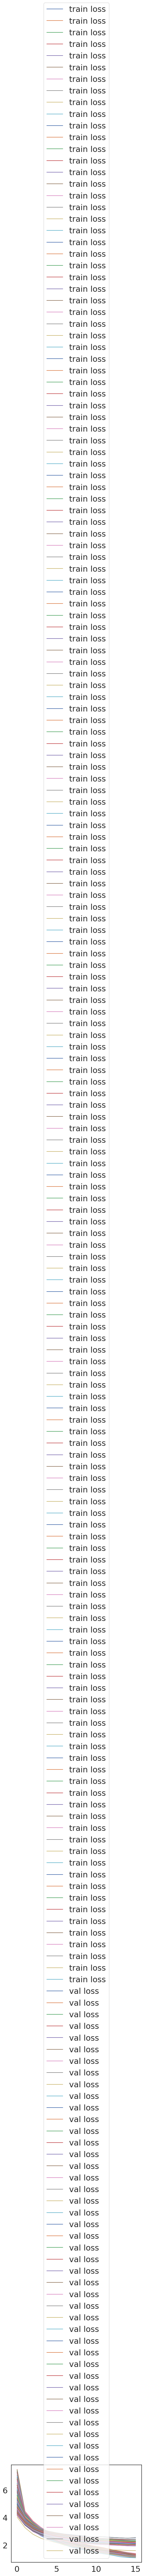

In [35]:
# Plot the loss
# YOUR CODE HERE
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend()
plt.show()

In [42]:
# Define a decode function to generate output sequence using greedy algorithm
# This basically saves us some compute time by taking a bunch of shortcuts (e.g. not computing the full softmax)
# YOUR CODE HERE
def greedy_decode(model, src, src_mask, max_len, start_symbol):
  src = src.to(DEVICE)
  src_mask = src_mask.to(DEVICE)

  memory = model.encode(src, src_mask)
  ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
  for i in range(max_len-1):
    memory = memory.to(DEVICE)
    tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                .type(torch.bool)).to(DEVICE)
    out = model.decode(ys, memory, tgt_mask)
    out = out.transpose(0, 1)
    prob = model.generator(out[:, -1])
    _, next_word = torch.max(prob, dim=1)
    next_word = next_word.item()

    ys = torch.cat([ys,
                    torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
    if next_word == EOS_IDX:
      break
  return ys

# Define a translation function that actually uses the model to translate a sentence from source to target
# YOUR CODE HERE

def translate(model: torch.nn.Module, src_sentence: str):
  model.eval()
  src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
  num_tokens = src.shape[0]
  src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
  tgt_tokens = greedy_decode(
      model, src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
  return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu()))).replace("<bos>", "").replace("<eos>", "")


## Let's try the model out on a few of our test sequences. Print the first 10 target/translated sequences from our test set

In [43]:
# YOUR CODE HERE
for i in range(10):
  test_pair = test_pairs[-i]
  test_str_de = test_pair[0]
  test_str_en = test_pair[1]
  print(f"Target: {test_str_en}")
  print(f"Translated: {translate(transformer, test_str_de)}")
  print(" ")

Target: Two casually dressed men sit down and enjoy a beer and food outdoors.
Translated:  Two men in casual clothing are enjoying a beer outdoors enjoying food . 
 
Target: A young boy with swimming goggles, jumping into a swimming pool.
Translated:  A boy wearing goggles , jumping into a pool . 
 
Target: Two boys in red uniforms playing soccer.
Translated:  Two young people in red uniform play soccer . 
 
Target: Kids being spun around in a glass spinner.
Translated:  Children are in a karate outfit . 
 
Target: A crowd of people in white and red clothing march through a red doorway set into a white alleyway, two men with cups looking on to the right.
Translated:  A crowd dressed in white march in front of a red city street in an alley while two men watch in the right . 
 
Target: A bird soars with wings spread.
Translated:  A bird flies into a swim trunks . 
 
Target: A lady on stilts on a sidewalk has spectators.
Translated:  A woman stands on stilts on a sidewalk while being watc